In [1]:
import pandas as pd

In [2]:
node_df = pd.read_csv("large_twitch_features.csv")
edges_df = pd.read_csv("large_twitch_edges.csv")
measures_df = pd.read_csv("centrality_measures.csv")
modularity_df = pd.read_csv("modularity.csv")

In [3]:
edges_df.head()

,numeric_id_1,numeric_id_2
0,98343,141493
1,98343,58736
2,98343,140703
3,98343,151401
4,98343,157118


In [4]:
node_df.head()

,views,mature,life_time,created_at,updated_at,numeric_id,dead_account,language,affiliate
0,7879,1,969,2016-02-16,2018-10-12,0,0,EN,1
1,500,0,2699,2011-05-19,2018-10-08,1,0,EN,0
2,382502,1,3149,2010-02-27,2018-10-12,2,0,EN,1
3,386,0,1344,2015-01-26,2018-10-01,3,0,EN,0
4,2486,0,1784,2013-11-22,2018-10-11,4,0,EN,0


In [4]:
measures_df.head()

,Node,Betweeness,Inward_degree,Outward_degree,Closeness_Centrality,PageRank,Clustering_Coefficient
0,98343,0.000000,0,39,0.356958,0.000002,0.242915
1,141493,8160.630825,1,4455,0.433157,0.000002,0.006747
2,58736,2962.755829,1,419,0.410676,0.000002,0.106069
3,140703,1089.975016,2,240,0.368487,0.000002,0.095779
4,151401,2050.712912,4,231,0.370242,0.000002,0.040189


In [5]:
modularity_df.head()

,Id,Label,modularity_class
0,98343,NaN,0
1,141493,NaN,2
2,58736,NaN,0
3,140703,NaN,0
4,151401,NaN,0


In [6]:
# Rename the 'Id' column in modularity_df to 'Node' for a consistent merge key
modularity_df = modularity_df.rename(columns={'Id': 'Node'})

# Merge the DataFrames on the 'Node' column
merged_df = pd.merge(measures_df, modularity_df[['Node', 'modularity_class']], on='Node', how='left')

In [7]:
merged_df.head()

,Node,Betweeness,Inward_degree,Outward_degree,Closeness_Centrality,PageRank,Clustering_Coefficient,modularity_class
0,98343,0.000000,0,39,0.356958,0.000002,0.242915,0
1,141493,8160.630825,1,4455,0.433157,0.000002,0.006747,2
2,58736,2962.755829,1,419,0.410676,0.000002,0.106069,0
3,140703,1089.975016,2,240,0.368487,0.000002,0.095779,0
4,151401,2050.712912,4,231,0.370242,0.000002,0.040189,0


In [10]:
# Calculate aggregate metrics for each modularity class
cluster_metrics = merged_df.groupby('modularity_class').agg({
    'Betweeness': ['mean', 'median', 'max', 'min'],
    'Inward_degree': ['mean', 'median', 'sum'],
    'Outward_degree': ['mean', 'median', 'sum'],
    'Closeness_Centrality': ['mean', 'median'],
    'PageRank': ['mean', 'median'],
    'Clustering_Coefficient': ['mean', 'median']
}).reset_index()

cluster_metrics.columns = ['_'.join(col).strip() for col in cluster_metrics.columns.values]

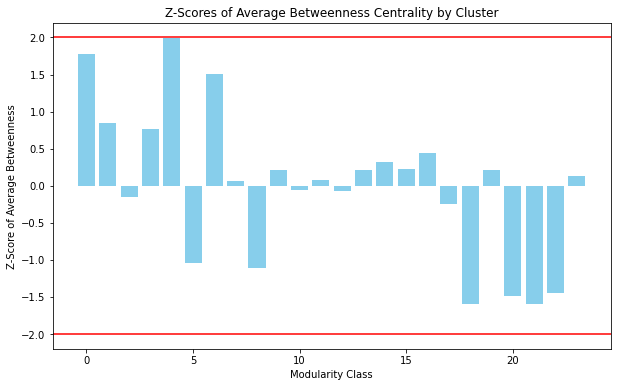

In [11]:
import numpy as np
import matplotlib.pyplot as plt

cluster_metrics['Betweeness_mean_zscore'] = (cluster_metrics['Betweeness_mean'] - cluster_metrics['Betweeness_mean'].mean()) / cluster_metrics['Betweeness_mean'].std()

# Plotting the Z-scores
plt.figure(figsize=(10, 6))
plt.bar(cluster_metrics['modularity_class_'], cluster_metrics['Betweeness_mean_zscore'], color='skyblue')
plt.xlabel('Modularity Class')
plt.ylabel('Z-Score of Average Betweenness')
plt.title('Z-Scores of Average Betweenness Centrality by Cluster')
plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=-2, color='r', linestyle='-')
plt.show()

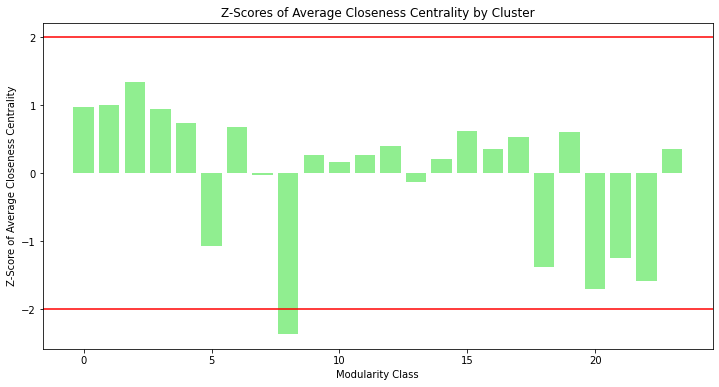

In [12]:
plt.figure(figsize=(12, 6))
cluster_metrics['Closeness_Centrality_mean_zscore'] = (cluster_metrics['Closeness_Centrality_mean'] - cluster_metrics['Closeness_Centrality_mean'].mean()) / cluster_metrics['Closeness_Centrality_mean'].std()
plt.bar(cluster_metrics['modularity_class_'], cluster_metrics['Closeness_Centrality_mean_zscore'], color='lightgreen')
plt.xlabel('Modularity Class')
plt.ylabel('Z-Score of Average Closeness Centrality')
plt.title('Z-Scores of Average Closeness Centrality by Cluster')
plt.axhline(y=2, color='r', linestyle='-')  # Highlight Z-score of +2
plt.axhline(y=-2, color='r', linestyle='-')  # Highlight Z-score of -2
plt.show()

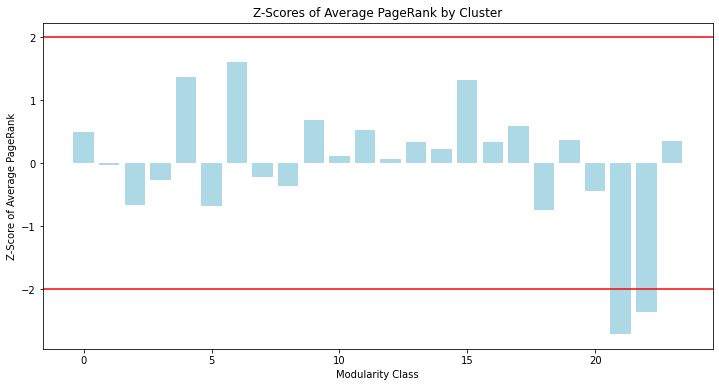

In [13]:
plt.figure(figsize=(12, 6))
cluster_metrics['PageRank_mean_zscore'] = (cluster_metrics['PageRank_mean'] - cluster_metrics['PageRank_mean'].mean()) / cluster_metrics['PageRank_mean'].std()
plt.bar(cluster_metrics['modularity_class_'], cluster_metrics['PageRank_mean_zscore'], color='lightblue')
plt.xlabel('Modularity Class')
plt.ylabel('Z-Score of Average PageRank')
plt.title('Z-Scores of Average PageRank by Cluster')
plt.axhline(y=2, color='r', linestyle='-')  # Highlight Z-score of +2
plt.axhline(y=-2, color='r', linestyle='-')  # Highlight Z-score of -2
plt.show()

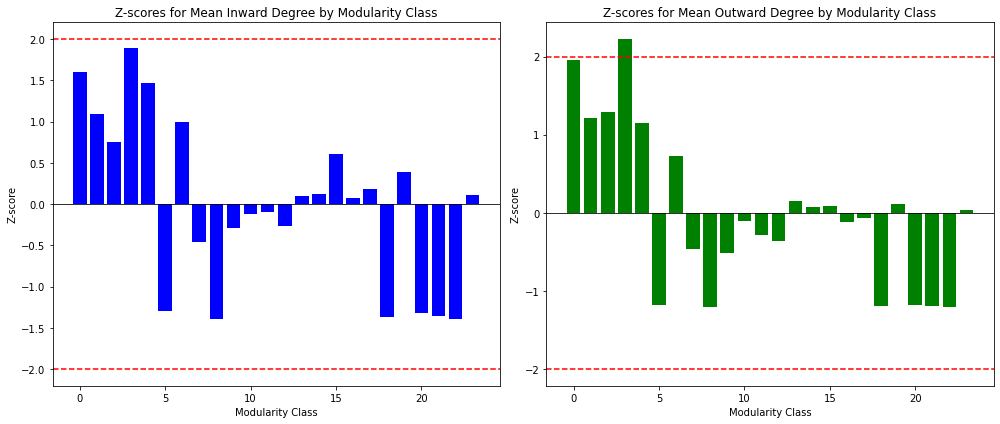

In [14]:
# Calculate Z-scores for mean inward and outward degrees
cluster_metrics['Inward_degree_mean_z'] = (cluster_metrics['Inward_degree_mean'] - cluster_metrics['Inward_degree_mean'].mean()) / cluster_metrics['Inward_degree_mean'].std()
cluster_metrics['Outward_degree_mean_z'] = (cluster_metrics['Outward_degree_mean'] - cluster_metrics['Outward_degree_mean'].mean()) / cluster_metrics['Outward_degree_mean'].std()

# Now, let's plot the Z-scores
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for inward degree Z-scores
ax[0].bar(cluster_metrics['modularity_class_'], cluster_metrics['Inward_degree_mean_z'], color='blue')
ax[0].set_title('Z-scores for Mean Inward Degree by Modularity Class')
ax[0].set_xlabel('Modularity Class')
ax[0].set_ylabel('Z-score')
ax[0].axhline(0, color='black', linewidth=0.8)  # Adds a line at Z=0
ax[0].axhline(2, color='red', linestyle='--')  # Highlight the threshold for significance
ax[0].axhline(-2, color='red', linestyle='--')

# Plot for outward degree Z-scores
ax[1].bar(cluster_metrics['modularity_class_'], cluster_metrics['Outward_degree_mean_z'], color='green')
ax[1].set_title('Z-scores for Mean Outward Degree by Modularity Class')
ax[1].set_xlabel('Modularity Class')
ax[1].set_ylabel('Z-score')
ax[1].axhline(0, color='black', linewidth=0.8)  # Adds a line at Z=0
ax[1].axhline(2, color='red', linestyle='--')  # Highlight the threshold for significance
ax[1].axhline(-2, color='red', linestyle='--')

plt.tight_layout()
plt.show()

Given the attributes of Clusters 5, 8, 18, 20, 21, and 22 in the Twitch social network, it's clear these clusters represent peripheral or niche segments of the network. The combination of low inward and outward degrees, extremely low PageRank for Clusters 21 and 22, negative closeness centrality, and low betweenness centrality provides a comprehensive picture of their roles and potential challenges within the larger network context.

**Characteristics and Implications**
Low Inward and Outward Degree indicate these clusters consist of nodes with fewer connections, suggesting they are less active or newer members of the community, or they represent very niche interests with limited following or engagement.

Extremely Low PageRank (Clusters 21 and 22) suggest these nodes are rarely endorsed by or connected to the more influential or authoritative nodes within the network. This could imply that they are either newer to the platform or engage in very specialized content that doesn't intersect with the broader Twitch community.

Negative Closeness Centrality and Low Betweenness indicate these clusters are not only peripheral but also do not serve as significant bridges or connectors within the network. Their ability to influence or affect the spread of information across the network is minimal due to their isolation.

**Strategic Insights**
Community Integration Efforts: Twitch and content creators could explore strategies to better integrate these peripheral clusters into the broader network. This could involve promoting content from these clusters to more central parts of the network or fostering collaborations with more established nodes.

Niche Community Support: Recognizing that these clusters may represent very specialized interests, providing tailored support or features to nurture these niche communities could enhance user satisfaction and retention. This approach acknowledges the value of diversity within the platform's content ecosystem.

Engagement and Growth Opportunities: The low degree and PageRank metrics suggest untapped potential for growth within these clusters. Initiatives aimed at increasing visibility and engagement for these nodes could help them develop into more active and interconnected community segments.

Content Discovery Enhancements: Improving content discovery mechanisms to surface diverse and niche content more effectively could help bridge the gap between these peripheral clusters and the broader Twitch community, potentially enriching the platform's content diversity.

**Conclusion**
Clusters 5, 8, 18, 20, 21, and 22 represent segments of the Twitch network that, while currently peripheral and less interconnected, hold potential for growth and diversification of the platform's community and content. Understanding and addressing the unique needs and characteristics of these clusters can contribute to a more vibrant, inclusive, and engaging social network ecosystem on Twitch.

In [16]:
# Sorting the DataFrame by 'Inward_degree'in descending order
sorted_df_indegree = merged_df.sort_values(by='Inward_degree', ascending=False)
# Top 10 nodes with the highest 'Inward_degree'
top_ten_nodes_indegree = sorted_df_indegree.head(10)  

print(top_ten_nodes_indegree)

         Node    Betweeness  Inward_degree  Outward_degree  \
5508   148398  3.231480e+07           1048             734   
35220  101472  2.947125e+07            905             561   
25239  138436  9.991363e+06            861            1014   
36238   47968  5.094351e+06            810             622   
90843  104231  4.720901e+06            795             543   
28583  122133  3.237305e+07            780            2801   
36819  121730  2.876740e+06            763             592   
25730  136179  1.653509e+07            749             661   
17436   21913  1.479822e+07            739            3169   
36190   77701  1.620145e+07            722             492   

       Closeness_Centrality  PageRank  Clustering_Coefficient  \
5508               0.408483  0.000062                0.034119   
35220              0.427681  0.000043                0.032936   
25239              0.400887  0.000024                0.041162   
36238              0.383793  0.000024                0.06

In [20]:
# Sorting the DataFrame by 'Betweenness'in descending order
sorted_df_betweeness = merged_df.sort_values(by='Betweeness', ascending=False)

# Top 10 nodes with the highest 'Betweenness'  
top_ten_nodes_betweeness = sorted_df_betweeness.head(10)  

print(top_ten_nodes_betweeness)

          Node    Betweeness  Inward_degree  Outward_degree  \
19181   161769  3.625520e+07            679             442   
28583   122133  3.237305e+07            780            2801   
5508    148398  3.231480e+07           1048             734   
35220   101472  2.947125e+07            905             561   
62790   126710  2.568518e+07            613             520   
111258  166130  2.159432e+07            462             198   
9465     22272  2.111621e+07            583             494   
71269   103794  2.073737e+07            518             676   
100233  125488  2.047951e+07            509             282   
78553    78786  2.040326e+07            601             483   

        Closeness_Centrality  PageRank  Clustering_Coefficient  \
19181               0.381061  0.000113                0.013233   
28583               0.412330  0.000021                0.003445   
5508                0.408483  0.000062                0.034119   
35220               0.427681  0.000043    

In [18]:
# Sorting the DataFrame by 'Closeness' in descending order
sorted_df_closeness = merged_df.sort_values(by='Closeness_Centrality', ascending=False)

# Top 10 nodes with the highest 'Closeness'  
top_ten_nodes_closeness = sorted_df_closeness.head(10)  

print(top_ten_nodes_closeness)

        Node    Betweeness  Inward_degree  Outward_degree  \
4812   61862  3.319194e+06             71           35208   
5535  125642  6.708559e+05             28           31036   
4480   32338  1.019887e+06             36           30463   
5881   71050  1.319613e+05              7           29905   
5205  110345  1.233586e+06             74           22601   
52     64605  2.923701e+05             18           20660   
251    52703  1.638914e+06             82           18679   
19    155127  6.416966e+04              4           18345   
2264   60588  9.726843e+05             64           14605   
5435  152296  4.270673e+05             56           11934   

      Closeness_Centrality  PageRank  Clustering_Coefficient  modularity_class  
4812              0.533777  0.000004                0.001427                 2  
5535              0.524432  0.000003                0.001802                 2  
4480              0.519311  0.000003                0.002270                 3  
5881

In [19]:
# Sorting the DataFrame by 'PageRank' in descending order
sorted_df_pagerank = merged_df.sort_values(by='PageRank', ascending=False)

# Top 10 nodes with the highest 'PageRank'  
top_ten_nodes_pagerank = sorted_df_pagerank.head(10)  

print(top_ten_nodes_pagerank)

          Node    Betweeness  Inward_degree  Outward_degree  \
145012   68971  7.855996e+04             37               1   
35868    93839  8.374301e+05            267              13   
62790   126710  2.568518e+07            613             520   
106489  154952  0.000000e+00              6               0   
19181   161769  3.625520e+07            679             442   
128644   37931  5.028567e+06            381              88   
150943   42873  0.000000e+00             23               0   
161886   71923  0.000000e+00             19               0   
39291    46899  1.610260e+07            410             206   
69501   129738  2.335572e+05             53               5   

        Closeness_Centrality  PageRank  Clustering_Coefficient  \
145012              0.316903  0.000131                0.102418   
35868               0.344155  0.000122                0.031695   
62790               0.377177  0.000117                0.004753   
106489              0.362525  0.000116    

**Cluster 0 high Inward degree and Betweenness** 

Characteristics:
Cluster 0 stands out for its remarkable presence across various metrics, particularly high inward degrees and betweenness centrality. This cluster is a vibrant mix of Twitch's most followed users, including streamers with massive audiences, and key connectors that play a pivotal role in knitting the network together. The nodes within this cluster are not just popular; they are integral to the structural and social fabric of the Twitch community, acting as major hubs through which information and trends flow.

Implications:
The dual significance of Cluster 0—as home to both highly influential personalities and critical community connectors—underscores its role as the backbone of the Twitch social network. Nodes within this cluster likely set the tone for the platform's culture, dictate trends, and influence the broader community's engagement and content preferences. Their ability to connect different parts of the network signifies a unique position of trust and authority, where they can significantly impact content dissemination and community dynamics.

Strategic Insights:
Given Cluster 0's central role, there are several strategic avenues to explore:

Content and Community Strategy: Collaborating with or highlighting content from this cluster can have amplified effects across the platform, making it a key strategy for promoting new initiatives, features, or content. Understanding the preferences and behaviors of this cluster can also inform platform development and community engagement efforts, ensuring that Twitch continues to meet and exceed the expectations of its core user base.

Network Health and Growth: Supporting the health of this cluster—through tools that enhance their content creation and community engagement capabilities—can have cascading benefits for the entire network. Initiatives aimed at fostering connectivity within and beyond this cluster can enhance the platform's cohesion and stimulate growth by integrating more peripheral parts of the network.

Trend Identification and Innovation: Cluster 0 is likely a hotbed for emerging trends and innovative content ideas. By closely monitoring this cluster, Twitch can gain early insights into evolving user interests and preferences, which can guide the platform's content curation and recommendation algorithms. This proactive approach can help Twitch stay ahead of the curve, ensuring it remains a dynamic and engaging platform for new and existing users alike.

**Cluster 2 High Closeness Centrality and PageRank**

Characteristics: This cluster's nodes are not only central within the network but are also deemed authoritative or important based on the link structure. High closeness centrality suggests these nodes can efficiently spread information across the network due to their shorter paths to other nodes. The high PageRank indicates that these nodes are well-connected and likely receive endorsements (in the form of follows) from other significant nodes.

Implications: Cluster 2 likely represents well-established influencers or content creators with a wide reach and impact across the Twitch platform. Their content or activities can quickly resonate throughout the community.

Strategic Insights: Supporting or collaborating with users in this cluster could be highly beneficial for promotional activities, community-building efforts, or spreading important information across the platform.

**Cluster 3: High Inward Degree**

Characteristics: With multiple nodes exhibiting a high number of followers, this cluster represents some of the most followed or popular individuals or groups within the network. A high inward degree is a direct indicator of popularity or influence.

Implications: This cluster's prominence suggests it includes some of the platform's main attractions, potentially drawing large audiences and fostering extensive community engagement.

Strategic Insights: Understanding the content or characteristics that make this cluster appealing can provide insights into community preferences, guiding content recommendations, or the development of new features to enhance user experience on Twitch.

**Cluster 6: Notable PageRank**

Characteristics: Highlighted for its significant PageRank, this cluster includes nodes that, while might not have the highest visibility in terms of sheer follower counts, hold considerable influence as dictated by the structure of their connections. These might be nodes endorsed by other influential nodes or ones that serve as important connectors within the community.

Implications: The authority indicated by the high PageRank suggests these users are trusted within the community, possibly serving as trendsetters or opinion leaders within niche areas.

Strategic Insights: Engaging with Cluster 6 could uncover emerging trends or niche interests within the Twitch community. Supporting these nodes might help diversify the platform's content and strengthen the network by reinforcing the importance of quality connections.

Overall Insight:
Each cluster plays a distinct role within the Twitch social network ecosystem, from broad influence and efficient information dissemination to popularity and authoritative presence. Recognizing and leveraging the unique contributions of these clusters can enhance content discovery, community engagement, and the overall cohesion of the Twitch network, benefiting both users and the platform itself.